In [43]:
import re

# Initialize empty lists to store the numbers
arr1, arr2, arr3, arr4, arr5 = [], [], [], [], []

# Open the file and read line by line
with open('Output.txt', 'r') as f:
    for line in f:
        # Use regex to find the pattern of numbers in each line
        numbers = re.findall(r'\(([^)]+)', line)
        if numbers:
            nums = list(map(float, numbers[0].split(',')))
            arr1.append(nums[0])
            arr2.append(nums[1])
            arr3.append(nums[2])
            arr4.append(nums[3])
            arr5.append(nums[4])

# Now arr1, arr2, arr3, arr4, and arr5 contain the numbers


In [44]:
import numpy as np

def average_every_n(arr, n=100):
    # Truncate array to a length that's a multiple of n
    truncated_len = (len(arr) // n) * n
    truncated_arr = arr[:truncated_len]
    
    # Reshape and average along the new axis
    averaged_arr = np.mean(np.reshape(truncated_arr, (-1, n)), axis=1)
    
    return averaged_arr

In [45]:
print(arr1)

[0.013516411185264587, 0.011888722889125347, 0.016811588779091835, 0.011363446712493896, 0.01113037671893835, 0.010530581697821617, 0.011960284784436226, 0.01193813793361187, 0.009812908247113228, 0.009348946623504162, 0.013257254846394062, 0.015446340665221214, 0.011004112660884857, 0.011142880655825138, 0.013426012359559536, 0.0070279436185956, 0.012358546257019043, 0.010912284255027771, 0.014397196471691132, 0.011367415077984333, 0.011108807288110256, 0.013820790685713291, 0.01008390262722969, 0.013025771826505661, 0.012820024974644184, 0.013931915163993835, 0.009065469726920128, 0.01169599499553442, 0.010489588603377342, 0.010960055515170097, 0.01144991535693407, 0.012427542358636856, 0.013635837472975254, 0.010594027116894722, 0.013526146300137043, 0.013370510190725327, 0.015600156038999557, 0.011750005185604095, 0.015960991382598877, 0.010609964840114117, 0.011995138600468636, 0.013026818633079529, 0.013127362355589867, 0.012311067432165146, 0.011127871461212635, 0.01383053045719

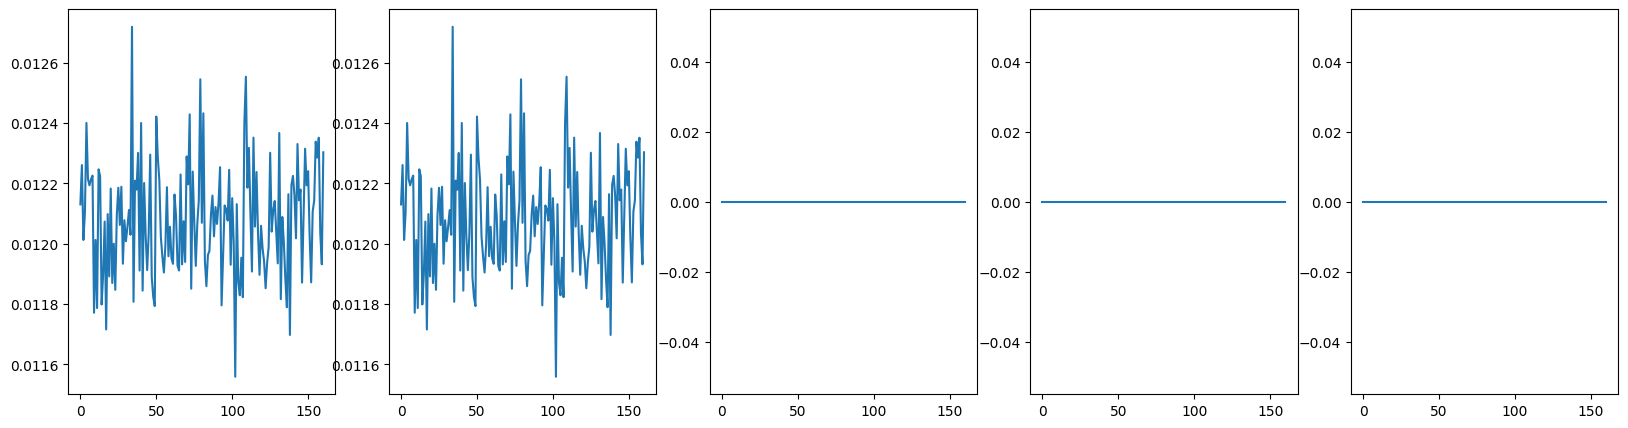

In [46]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,5, figsize=(20, 5))
ax[0].plot(average_every_n(arr1))
ax[1].plot(average_every_n(arr2))
ax[2].plot(average_every_n(arr3))
ax[3].plot(average_every_n(arr4))
ax[4].plot(average_every_n(arr5))
plt.show()

In [47]:
Nbatches = 1895
n = 100
Epochs = np.arange(len(arr1)//Nbatches)
print(Epochs)
Epochs =Epochs*Nbatches/n

T_loss = average_every_n(arr1, n=n)
E_loss = average_every_n(arr2, n=n)
C_loss = average_every_n(arr3, n=n)
A_loss = average_every_n(arr4, n=n)
X_loss = average_every_n(arr5, n=n)


[0 1 2 3 4 5 6 7]


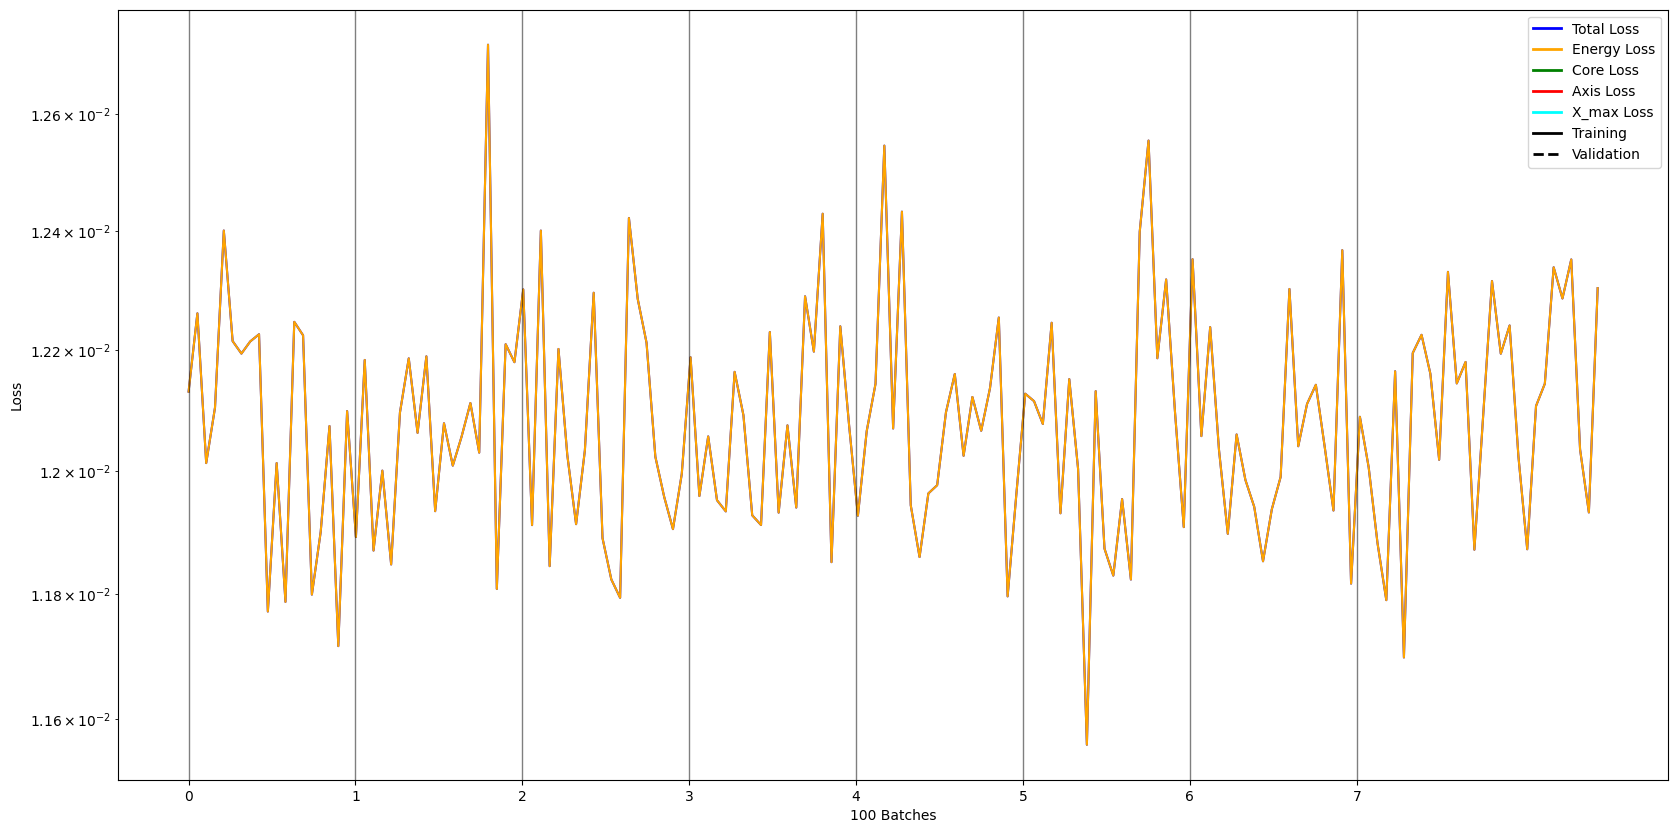

In [48]:
from matplotlib.lines import Line2D
# Define colors
colors = ['blue', 'orange', 'green', 'red','cyan']

# Plot training loss
plt.figure(figsize = [20,10])
plt.plot(T_loss, color=colors[0], label='Total Loss - Training')
plt.plot(E_loss, color=colors[1], label='Energy Loss - Training')
plt.plot(C_loss, color=colors[2], label='Core Loss - Training')
plt.plot(A_loss, color=colors[3], label='Axis Loss - Training')
plt.plot(X_loss, color=colors[4], label='Xmax Loss - Training')

# Set up custom legend

custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2),
                Line2D([0], [0], color=colors[3], lw=2),
                Line2D([0], [0], color=colors[4], lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', linestyle='dashed', lw=2)]

for epochLine in Epochs:
    plt.axvline(epochLine, color='black', lw=1,alpha = 0.5)


plt.legend(custom_lines, ['Total Loss', 'Energy Loss', 'Core Loss', 'Axis Loss','X_max Loss', 'Training', 'Validation'])

plt.xlabel('100 Batches')
plt.ylabel('Loss')
plt.yscale('log')
# plt.grid('off')
plt.xticks(Epochs,labels = np.arange(len(Epochs)))
plt.show()